In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
#to plot our data and model visually
import numpy as np 
#To help us perform math operations

In [2]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
])
 
y = np.array([-1,-1,1,1])

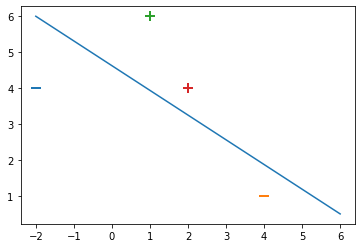

In [3]:
for d, sample in enumerate(X):
    # Plot the negative samples (the first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples (the last 2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
 
# Draw a possible hyperplane, that separates the two classes.
#we will be using two points and draw the line between them (random guess)
plt.plot([-2,6],[6,0.5])

In [4]:
def svm_plot(X,Y):
    #Initialize SVMs weight vector with zeros 
    w = np.zeros(len(X[0]))
    #Now we set the learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []
     
    #After that we loop over the 100k epochs and perform, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
         
   #let us plot the rate of classification errors during training 
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
     
    return w

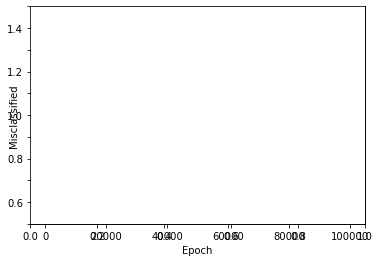

In [5]:
w = svm_plot(X,y)

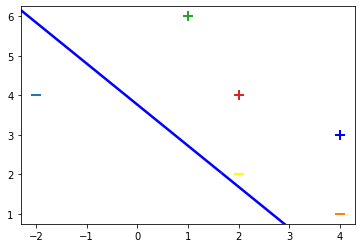

In [6]:
for d, sample in enumerate(X):
 # Plot the negative samples
 if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
 # Plot the positive samples
 else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
 
# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')
 
# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]
 
x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')